# Introduction to Probability

By Charles M. Grinstead & J. Laurie Snell  
Notes by Joe McGrath

[Link to the book](https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf)

This is a PDF I was recommended as a way to get back up to speed on probability as a preparation for machine learning. The resources around it are in a varietyy of computer languages, but I'm converting it to Python as I go.

In [1]:
%matplotlib inline

import random # Random number generation.
import collections # For simpler counters etc.
import matplotlib.pyplot as plt # Creating graphs

# Setting seed for a consistent output
random.seed(0)

## Contents

* [1 - Discrete Probability Distributions](#Chapter-1---Discrete-Probability-Distributions)
    * [Probability](#Probability)
    * [Simulation](#Simulation)
    * X
    * [Exercises](#Chapter-1-Exercises)
* [2 - Continuous Probability Densities](#Chapter-2---Continuous-Probability-Densities)

## Chapter 1 - Discrete Probability Distributions

(PDF page 11)

## 1.1 - Simulation of Discrete Probabilities

### Probability

This chapter deals with chance experiments with a finite number of possible outcomes, e.g. a coin toss or dice roll.

By convention, the possible outcomes of these are referred to with the notation: 'ω1, ω2, . . . , ωn'.

> A *random variable* is an expression whose value is the outcome of a particular experiment.

For example if X is a random variable representing a dice roll, we can assign each outcome (````ωj````) of the experiment a probability (````m(ωj)````). These probabilities must be a non-negative number such that:

    m(ω1) + m(ω2) + · · · + m(ω6) = 1

The proper name for the function ````m(ωj)```` is the *distribution function* of the random variable X. In this case, the outcome of the probability function is always 1/6.

In most actual example, the distribution of outcomes isn't even. The example given here is a drug that's effective 30% of the time it's used. In this case, any time the drug is used, the probability it's effective is 0.3 and the probability it's ineffective is 0.7. This is called the *frequency concept of probability* - if we know the probability of an outcome, then as the number of repetitions increases, the observations will trend towards matching that probability.

### Simulation

If we know the probabilities attached to each outcome, we can simulate the result in a computer (in theory we could also use a dice with an appropriate number of sides, but that's a bit impractical).

The greater power of simulations is to estimate probabilities that are *not* known.

### Random Numbers

*Random number generators* are the class of function that deal with random numbers.

In Python, the stanard library for this is handily called [random](https://docs.python.org/3/library/random.html), and deals quite nicely with most of Python's normal data structures. This largely bypasses the technical details of the book.

As in all cases with computers, it's worth noting the numbers are [pseudorandom](https://en.wikipedia.org/wiki/Pseudorandomness) (i.e. not *actually* random, but pulled from some esoteric input) unless the computer is pulling in some [external source of randomness](https://www.youtube.com/watch?v=SxP30euw3-0). With Python it's possible to set the *seed* of the generator, so that it starts out at the same point (for repeatability, see the top of this document).

**Example 1.1 - Random Number Generation**

In [2]:
def random_numbers(n = 1):
    """Generate n random numbers."""
    return [random.random() for _ in range(n)]

print(random_numbers(20))

[0.8444218515250481, 0.7579544029403025, 0.420571580830845, 0.25891675029296335, 0.5112747213686085, 0.4049341374504143, 0.7837985890347726, 0.30331272607892745, 0.4765969541523558, 0.5833820394550312, 0.9081128851953352, 0.5046868558173903, 0.28183784439970383, 0.7558042041572239, 0.6183689966753316, 0.25050634136244054, 0.9097462559682401, 0.9827854760376531, 0.8102172359965896, 0.9021659504395827]


**Example 1.2 - Coin Tossing**

In [3]:
def coin_toss(n = 1):
    """A group of coin tosses."""
    return [random.choice(['H', 'T']) for _ in range(n)]

toss = coin_toss(20)
print(toss)
print(collections.Counter(toss))

['T', 'H', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'T']
Counter({'T': 12, 'H': 8})


Note that with such a small sample size, the counts can easily be off by a large margin from the raw probibilities - this gets averaged out over a large number of observations.

In [4]:
print(collections.Counter(coin_toss(10000)))

Counter({'H': 5020, 'T': 4980})


**Example 1.3 Dice Rolling**

This example comes from a [famous game](http://mathworld.wolfram.com/deMeresProblem.html) played in Pascal / Fermat's time. The end-point of the story is 2 games:

1. Rolling 4 dice and seeing if a 6 comes up once.
2. Rolling 24 / 25 pairs of dice and seeing if a pair of 6's comes up.


Counter({True: 511, False: 489})


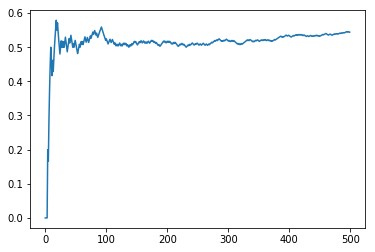

In [5]:
def dice_roll(n = 1, d = 6):
    """Roll a number of dice, by default 6-sided dice."""
    return [random.choice(range(d)) + 1 for _ in range(n)]

def de_mere_1(n = 50, x = 4):
    """Rolls x dice n times and checks how many times a 6 comes up."""
    return collections.Counter([6 in dice_roll(x) for _ in range(n)])

def de_mere_1_plot(n = 50, x = 4):
    counter = 0
    output = [None] * n
    for i in range(n):
        counter += 6 in dice_roll(x)
        output[i] = counter / (i + 1)
    return output

print(de_mere_1(1000))

plt.plot(de_mere_1_plot(500))

So this game is *slightly* favourable to the person betting on there being a 6. The authors note that it's easily popssible for such a narrow margin to go either way in a small sample set - there's plenty of places on the graph with a probability lower than half.

> *Accurate results by simulation require a large number of experiments.*


Counter({False: 506, True: 494})


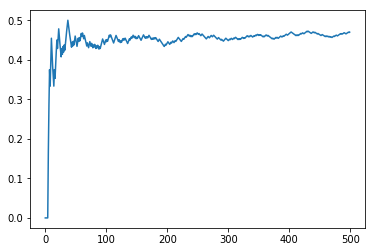

In [6]:
def multi_dice_roll(x = 3, n = 2, d = 6):
    """Rolls x sets of n dice. Results are sorted for easier comparison."""
    rolls = [dice_roll(n, d) for _ in range(x)]
    for roll in rolls:
        roll.sort()
    return rolls

def rolls_to_str(rolls):
    """Converts a list of rolls into a list of strings for easier counting."""
    return [str(x) + '|' + str(y) for x, y in rolls]

def de_mere_2_single(x = 24):
    return '6|6' in rolls_to_str(multi_dice_roll(x))

def de_mere_2(x = 1000, n = 24):
    return [de_mere_2_single(n) for _ in range(x)]

def de_mere_2_plot(x = 1000, n = 24):
    results = de_mere_2(x, n)
    counter = 0
    output = [None] * x
    for i in range(len(results)):
        counter += results[i]
        output[i] = counter / (i + 1)
    
    return output

print(collections.Counter(de_mere_2(1000)))
plt.plot(de_mere_2_plot(500, 24))

> in these types of experiments, a rough rule of thumb is that, at least 95% of the time, the error doesnot exceed the reciprocal of the square root of the number of trials.

For simple games like this, we don't really *need* the simulations as we can calculate the statistics. In this case we know the probability of *not* rolling a 6 is 5/6, with each subsequent roll being another multiple of 5/6, so:

In [7]:
1 - (5/6) ** 4

0.5177469135802468

An for the second game, the chance of a pair of 6's is 35 / 36, so for 24 / 25 rolls respectively:

In [8]:
print(1 - (35/36) ** 24)
print(1 - (35/36) ** 25)

0.4914038761309034
0.5055315462383783


And with the above rule of thumb, we can calculate how many trials we'd need to work out if the result of these is above or below 0.5:

In [9]:
(1 / 0.006) ** 2

27777.777777777774

**Example 1.4**

This is an example of using a simulation to estimate the probability of something that's not a simple 'this then that' question. In this case the game is that a set of 40 coins is flipped, for each head Peter takes 1 penny of Paul and for each tail, Paul takes a penny of Peter.

If we want to know the answer to questions like 'what is the chance that Peter has j pennies at the end of the game' or 'how many times with Peter be in the lead at the end of the game' (with a draw being counted as a win).

[1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 5, 6, 5, 4, 5, 6, 7, 8, 9, 8, 7, 8, 7, 6, 5, 6, 5, 6, 5, 4, 3, 4, 3, 4, 5, 4, 5, 6]


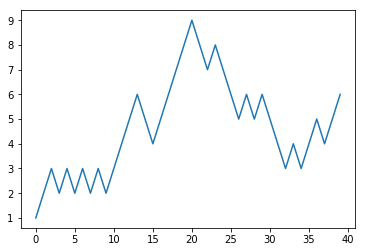

In [10]:
def ht_simulation(n = 40):
    tosses = coin_toss(n)
    pennies = 0
    total_pennies = []
    for toss in tosses:
        if toss == 'H':
            pennies += 1
        else:
            pennies -= 1
        total_pennies.append(pennies)
    return total_pennies

result = ht_simulation()
print(result)
plt.plot(result)

In [11]:
def multi_ht_simulation(n = 100):
    return [ht_simulation()[-1] >= 0 for _ in range(n)]

print(multi_ht_simulation())

[False, False, False, False, False, True, True, False, False, True, True, False, True, True, True, True, True, False, False, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, False, True, True, True, True, True, False, False, False, True, True, True, False, True, True, False, False, True, False, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, False, False, True, False, True, True, True, False, False, True, True, True, False]


### Chapter 1 Exercises

p. 12

> 1 - Modify the program CoinTosses to toss a coin n times and print out after
every 100 tosses the proportion of heads minus 1/2. Do these numbers appear
to approach 0 as n increases? Modify the program again to print out, every
100 times, both of the following quantities: the proportion of heads minus 1/2,
and the number of heads minus half the number of tosses. Do these numbers
appear to approach 0 as n increases?

In [12]:
def anounce_coin_stats(runs, n = 100):
    """Run a number of coin tosses"""
    results = collections.Counter()
    for _ in range(runs):
        results.update(coin_toss(n))
        total_rolls = results['H'] + results['T']
        heads_prop = results['H'] / total_rolls - 0.5
        heads_count = results['H'] - (total_rolls / 2)
        print(f'{total_rolls} rolls:\n',
              f'  Proportion of heads - 1/2:\t{round(heads_prop, 5)}\n',
              f'  Offset of heads count:\t{heads_count}'
             )
    
anounce_coin_stats(10, 50)
print('-'*20)

50 rolls:
   Proportion of heads - 1/2:	0.12
   Offset of heads count:	6.0
100 rolls:
   Proportion of heads - 1/2:	0.07
   Offset of heads count:	7.0
150 rolls:
   Proportion of heads - 1/2:	0.02
   Offset of heads count:	3.0
200 rolls:
   Proportion of heads - 1/2:	0.025
   Offset of heads count:	5.0
250 rolls:
   Proportion of heads - 1/2:	0.028
   Offset of heads count:	7.0
300 rolls:
   Proportion of heads - 1/2:	0.01667
   Offset of heads count:	5.0
350 rolls:
   Proportion of heads - 1/2:	0.00857
   Offset of heads count:	3.0
400 rolls:
   Proportion of heads - 1/2:	0.01
   Offset of heads count:	4.0
450 rolls:
   Proportion of heads - 1/2:	0.00222
   Offset of heads count:	1.0
500 rolls:
   Proportion of heads - 1/2:	0.004
   Offset of heads count:	2.0
--------------------


I opted for a shorter gap between reports to better illustrate the effect, but this does seem to illustrate the frequency concept fairly well. Occasionally there'll be an imballance, but there's a definite trend towards an equal count of both outcomes.

> 2 - Modify the program CoinTosses so that it tosses a coin *n* times and records whether or not the proportion of heads is within .1 of .5 (i.e., between .4 and .6). Have your program repeat this experiment 100 times. About how large must *n* be so that approximately 95 out of 100 times the proportion of heads is between .4 and .6?